Imports
-------

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from FlowCyPy import units
from FlowCyPy import NoiseSetting
from FlowCyPy.dev import get_scatterer_metrics, get_trigger_metrics, get_acquisition_analog_metrics, get_acquisition_digital_metrics
from FlowCyPy import circuits
from MPSPlots.styles import mps

Settings
--------

In [2]:
NoiseSetting.include_noises = True
NoiseSetting.include_shot_noise = True
NoiseSetting.include_amplifier_noise = False
NoiseSetting.include_source_noise = False
NoiseSetting.include_dark_current_noise = False

NoiseSetting.assume_perfect_hydrodynamic_focusing = True

kwargs = dict(
    bit_depth='25bit',
    saturation_levels = (0 * units.volt, 5 * units.volt),
    processing_steps=[],
    # optical_power=100 * units.milliwatt
)

Utils
----

In [3]:
def add_plot_to_ax(ax, x, y, label='', degree = None):
    ax.scatter(x, y, label='data', linewidth=2)

    if degree is not None:
        max_degree = np.max(degree)
        fit = np.polyfit(x=x, y=y, deg=max_degree)[::-1]

        fit = np.take(fit, degree)

        x_poly = np.asarray(
            [x ** deg for deg in degree]
        )
        
        y_fit = np.dot(x_poly.T, fit)

        label = [
            f"degree {deg}: {f: .2e}       " for deg, f in zip(degree, fit)
        ]
        
        label = "".join(label)
        
        ax.plot(x, y_fit, label=label, linestyle='--', color='red')

    ax.legend()

Simulating background
---------------------

In [4]:
plt.close('all')
background_df = get_acquisition_digital_metrics(
    diameter_list=[None],
    index_list=[None],
    background_fraction=0.01,
    run_time = 1 * units.millisecond,
    optical_power=np.linspace(1, 100, 10) * units.milliwatt,
    particle_count=100,
    **kwargs,
)

background_df = background_df.astype(float)

Simulating configuration background_power = 0.01 mW, optical_power = 1.0 mW, run_time = 1 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration background_power = 0.12 mW, optical_power = 12.0 mW, run_time = 1 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration background_power = 0.23 mW, optical_power = 23.0 mW, run_time = 1 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration background_power = 0.34 mW, optical_power = 34.0 mW, run_time = 1 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration background_power = 0.45 mW, optical_power = 45.0 mW, run_time = 1 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration background_power = 0.56 mW, optical_power = 56.0 mW, run_time

In [5]:
background_df

,Mean,Median,STD,CV,InvSqrtMedian,rSTD,rCV,OpticalPower,BackgroundPower,BackgroundFraction
Run,,,,,,,,,,
0,671.582333,672.0,0.767933,0.001143,0.038576,0.5,0.000744,1.0,0.01,0.01
1,8053.558067,8054.0,2.449496,0.000304,0.011143,2.5,0.000310,12.0,0.12,0.01
2,15435.516767,15436.0,3.382049,0.000219,0.008049,3.5,0.000227,23.0,0.23,0.01
3,22817.523683,22817.5,4.110333,0.000180,0.006620,4.5,0.000197,34.0,0.34,0.01
4,30199.484433,30199.0,4.711987,0.000156,0.005754,4.5,0.000149,45.0,0.45,0.01
5,37581.433983,37581.0,5.270162,0.000140,0.005158,5.5,0.000146,56.0,0.56,0.01
6,44963.503867,44963.0,5.747108,0.000128,0.004716,5.5,0.000122,67.0,0.67,0.01
7,52345.432317,52345.0,6.235630,0.000119,0.004371,6.5,0.000124,78.0,0.78,0.01
8,59727.364433,59727.0,6.674473,0.000112,0.004092,6.5,0.000109,89.0,0.89,0.01


<Axes: xlabel='CV', ylabel='InvSqrtMedian'>

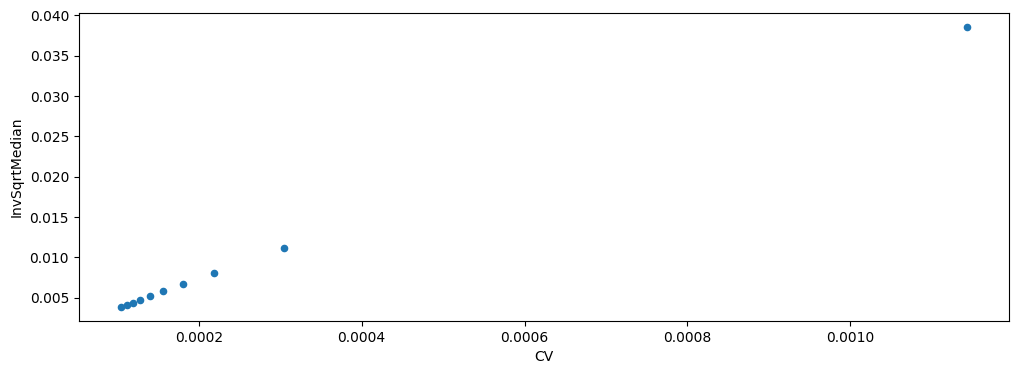

In [6]:
plt.close('all')
background_df.plot.scatter(x='CV', y='InvSqrtMedian', figsize=(12, 4))

Simulating beads signal
-----------------------

In [7]:
plt.close('all')
N_elements = 15
diameter_list = np.linspace(200, 1200, N_elements) * units.nanometer
index_list = np.ones(N_elements) * 1.44 * units.RIU

beads_df = get_trigger_metrics(
    diameter_list=diameter_list,
    index_list=index_list,
    background_fraction=0.01,
    optical_power=np.linspace(1, 100, 1) * units.milliwatt,
    run_time = 6 * units.millisecond,
    particle_count=100,
    threshold='9 sigma',
    **kwargs,
    # plot_analog=True,
    # plot_trigger=True
)

Simulating configuration Delta(position=200.000 nm), background_power = 0.01 mW, optical_power = 1.0 mW, run_time = 6 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration Delta(position=271.429 nm), background_power = 0.01 mW, optical_power = 1.0 mW, run_time = 6 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration Delta(position=342.857 nm), background_power = 0.01 mW, optical_power = 1.0 mW, run_time = 6 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration Delta(position=414.286 nm), background_power = 0.01 mW, optical_power = 1.0 mW, run_time = 6 ms, bit_depth = '25bit', saturation_levels = (<Quantity(0, 'volt')>, <Quantity(5, 'volt')>)
Simulating configuration Delta(position=485.714 nm), background_power = 0.01 mW, optical_power = 1.0 mW, run_time = 6 ms, bit_depth = '25bit', saturation_levels

Step 01: Correct beads signal median
-------

\begin{align}
 S_{p, i} &= \left( \text{Median}_{bead, i} - \text{Median}_{back.} \right)\\[20pt]
 \text{rCV}_{corr, i} &= \frac{\text{rSD}_{bead, i}}{S_{p, i}}
\end{align}


Step 02: Isolate the photon‑noise CV
-------

\begin{align}
 \text{CV}_{p, phot, i} = \sqrt{\left( \text{rCV}_{corr, i} \right)^2 - \left( \text{rCV}_{bright} \right)^2}
\end{align}

Step 03: Fit J
-------

\begin{align}
 \text{CV}_{p, phot, i} = \frac{J}{\sqrt{S_{p, i}}}
\end{align}

Step 04: Fit K
-------

\begin{align}
 \sigma_{s, i} = K S_{p, i}
\end{align}

In [28]:
beads_df['MedianCorrected'] = beads_df['Median'] - background_df[background_df.BackgroundPower == 0.01]['Median'].values[0]

beads_df['rCV'] = beads_df['STD'] / beads_df['MedianCorrected']

dim_rCV = beads_df.loc[200]['rCV'].values[0]

bright_rCV = beads_df.loc[1200]['rCV'].values[0]

CV_p_photon = np.sqrt(
    dim_rCV**2 - bright_rCV**2
)

CV_p_photon

0.02325926220832551

,,,Mean,Median,STD,CV,Csca,DetectorPower,MedianCorrected,CVCorrected,rCV
Diameter,OpticalPower,BackgroundPower,,,,,,,,,
200.000000,1.0,0.01,695.112245,695.0,0.535014,0.000770,1.027811e+03,0.000342,23.0,0.023261,0.023261
271.428571,1.0,0.01,791.530000,792.0,0.758188,0.000957,4.036713e+03,0.001789,120.0,0.006318,0.006318
342.857143,1.0,0.01,1051.450000,1051.0,0.925235,0.000880,1.131189e+04,0.005679,379.0,0.002441,0.002441
414.285714,1.0,0.01,1569.987500,1570.0,1.174559,0.000748,2.510418e+04,0.013436,898.0,0.001308,0.001308
485.714286,1.0,0.01,2438.610000,2439.0,1.476380,0.000605,4.877655e+04,0.026425,1767.0,0.000836,0.000836
557.142857,1.0,0.01,3779.610000,3780.0,1.885056,0.000499,8.536422e+04,0.046479,3108.0,0.000607,0.000607
628.571429,1.0,0.01,5786.830000,5787.0,2.470247,0.000427,1.391797e+05,0.076498,5115.0,0.000483,0.000483
700.000000,1.0,0.01,8644.956989,8645.0,3.123940,0.000361,2.136171e+05,0.119248,7973.0,0.000392,0.000392
771.428571,1.0,0.01,12560.336735,12561.0,4.969897,0.000396,3.138076e+05,0.177800,11889.0,0.000418,0.000418


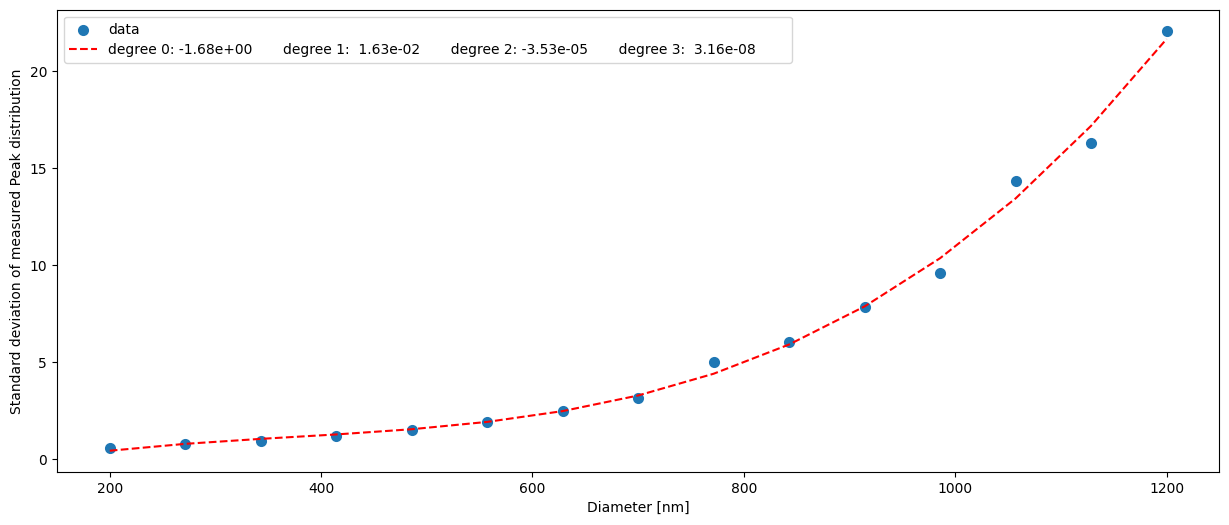

In [10]:
%matplotlib inline

figure, ax = plt.subplots(1, 1, figsize=(15, 6))
_df = beads_df.reset_index()


add_plot_to_ax(ax=ax, x=_df['Diameter'], y=_df['STD'], degree=[0, 1, 2, 3])
ax.set_xlabel('Diameter [nm]')
ax.set_ylabel('Standard deviation of measured Peak distribution')
plt.show()

Plot linear relationships
-------------------------

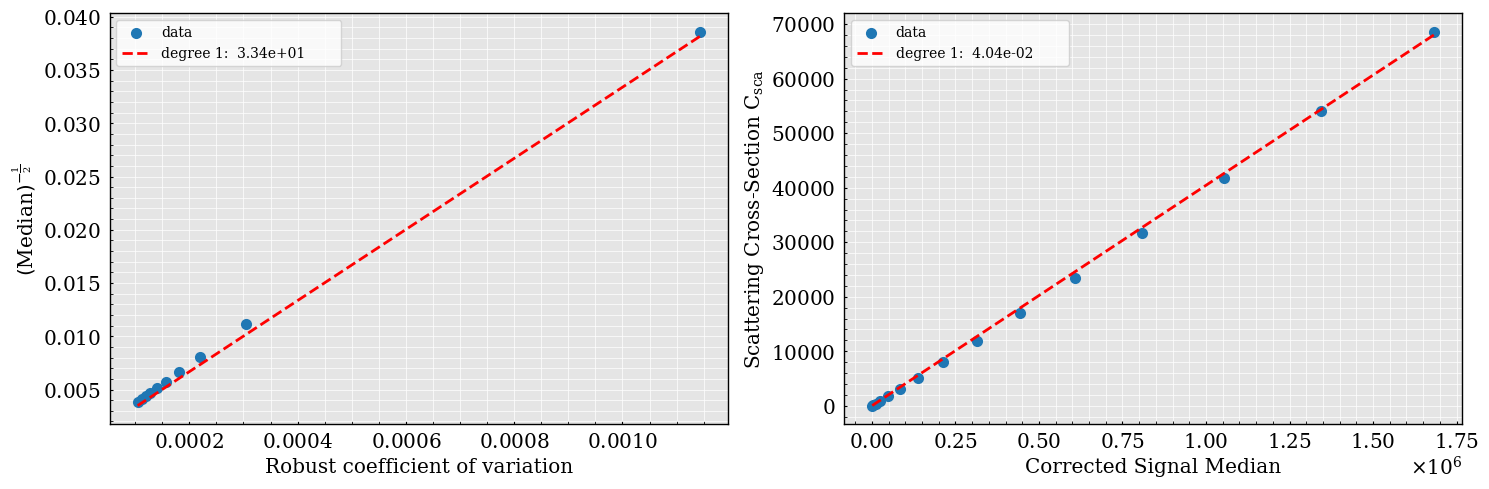

In [11]:
J_x = background_df['CV'].values
J_y = background_df['InvSqrtMedian'].values
J_fit, J_residuals, _, _, _ = np.polyfit(J_x, J_y,  deg=1, full=True)
J = J_fit[0] * (units.bit_bins / units.particle)**0.5

K_y = beads_df['MedianCorrected'].values
K_x = beads_df['Csca'].values
K_fit, K_residuals, _, _, _ = np.polyfit(x=K_x, y=K_y, deg=1, full=True)
K = K_fit[0] * units.nanometer ** 2 / units.bit_bins


with plt.style.context(mps):
    figure, axes = plt.subplots(1, 2, figsize=(15, 5))
    ax = axes[0]
    ax.set_xlabel('Robust coefficient of variation')
    ax.set_ylabel(r'$\left(Median\right)^{-\frac{1}{2}}$')
    add_plot_to_ax(ax=ax, x=J_x, y=J_y, degree=[1])

    ax = axes[1]
    add_plot_to_ax(ax=ax, x=K_x, y=K_y, degree=[1])
    ax.set_xlabel('Corrected Signal Median')
    ax.set_ylabel(r'Scattering Cross-Section $C_{sca}$')
    
    plt.show()



In [16]:
from FlowCyPy.physical_constant import PhysicalConstant


cytometer = beads_df.attrs['cytometer']

P_det = beads_df['DetectorPower'].values[0] * units.milliwatt
responsivity = cytometer.detectors[0].responsivity
sampling_rate = cytometer.digitizer.sampling_rate
dt = 1 / sampling_rate
Csca = beads_df['Csca'].values[0] * units.nanometer ** 2


N_pe = (responsivity * P_det * dt / PhysicalConstant.e).to('dimensionless')
Q_ = N_pe / Csca

print('FlowCyPy Q: ', Q_)



Q_leonie = 1 / (J**2 * K)
print('Leonie Q: ', Q_leonie)


FlowCyPy Q:  34.65239621595696 1/nm²
Leonie Q:  0.02218866682777784 particle/nm²


$$
    S_p = \text{Median}_{bead} - \text{Median}_{back}
$$

$$
  \text{rSD} = \frac{P_{84.13} - P_{15.87}}{2}
$$